In [1]:
import numpy                as     np
from sklearn                import datasets
import pandas               as     pd
from sklearn.decomposition  import PCA
from sklearn.preprocessing  import StandardScaler
from sklearn.cluster        import KMeans
from scipy.stats            import zscore
from IPython.utils          import io
from sklearn.metrics        import silhouette_score


import matplotlib.pyplot    as     plt
import seaborn              as     sns
%matplotlib inline

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [2]:
#datasets.load*?

In [3]:
def sklearn_to_df(sklearn_dataset):
    df            = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target']  = pd.Series(sklearn_dataset.target)
    return df

In [4]:
df        = sklearn_to_df(datasets.load_wine())
X         = df.drop('target',axis = 1)
y         = df['target']
#X_scaled = pd.DataFrame(StandardScaler().fit_transform(X))
X_scaled  = X.apply(zscore) 

### PCA

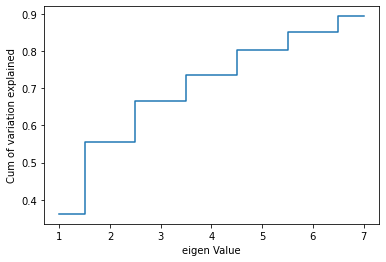

In [5]:
pca  = PCA(n_components = 7)
Xpca = pd.DataFrame(pca.fit_transform(X_scaled))
np.cumsum(pca.explained_variance_ratio_)

plt.step(list(range(1,8)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

### K Means

In [6]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X_scaled)

KMeans(n_clusters=2)

Clusters 2 Silhoutte coeff. 0.2593
Clusters 3 Silhoutte coeff. 0.2849
Clusters 4 Silhoutte coeff. 0.2614
Clusters 5 Silhoutte coeff. 0.2023
Clusters 6 Silhoutte coeff. 0.1789
Clusters 7 Silhoutte coeff. 0.1422
Clusters 8 Silhoutte coeff. 0.1301
Clusters 9 Silhoutte coeff. 0.1535


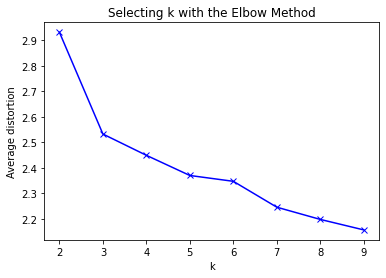

In [7]:
from sklearn.metrics import silhouette_score

#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(2,10)
meanDistortions=[]

#with io.capture_output() as captured:

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(X_scaled)
    prediction=model.predict(X_scaled)
    meanDistortions.append(sum(np.min(cdist(X_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / X_scaled.shape[0])
    print('Clusters {} Silhoutte coeff. {:.4f}'.format(k,silhouette_score(X_scaled,model.labels_)))


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()

In [8]:
from sklearn.cluster import AgglomerativeClustering 

model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')

model.fit(X_scaled)

X_scaled['labels'] = model.labels_
X_scaled.head(2)

#custDataAttr.groupby(["labels"]).count()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,labels
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,0
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,0


In [9]:
X_Clust = X_scaled.groupby(['labels'])

X_Clust.mean()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
labels,,,,,,,,,,,,,
0,0.014429,0.013596,-0.019830,-0.027820,-0.028664,-0.017585,-0.017904,0.000807,0.001949,0.013306,-0.014882,-0.014313,0.003433
1,-0.778980,-1.253450,-3.679162,-2.671018,-0.824415,-0.504914,-1.465058,-0.659563,-2.051513,-1.344466,0.406051,-1.118210,-0.722540
2,-0.577220,-0.370748,2.376519,2.503893,1.937310,1.188216,1.526763,0.173077,0.570773,-0.323601,0.727789,1.202904,0.041738


Cophenet  0.7649020432765025


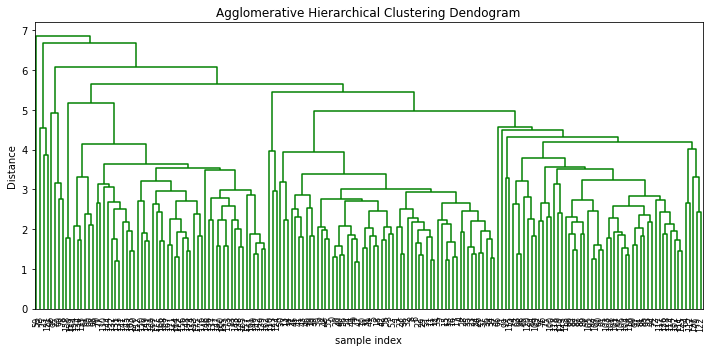

In [13]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

from scipy.spatial.distance import pdist  #Pairwise distribution between data points

# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(X_scaled, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(X_scaled))

print('Cophenet ',c)

plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()